# **Insurance Fraud Detection Project**

## **1. Business Understanding**

### **Objective**  
The goal of this project is to develop a **machine learning model** to identify potential **fraudulent insurance claims** using historical data. Achieving this will enable the business to:  
1. **Minimize Financial Loss**: Detect fraudulent claims early to reduce unnecessary payouts.  
2. **Improve Operational Efficiency**: Prioritize high-risk claims for investigation, reducing manual efforts.  
3. **Enhance Customer Trust**: Ensure faster resolutions for genuine claims by optimizing resource allocation.

---

### **Key Questions**
1. **What defines fraud?**  
   Fraud refers to claims flagged in the dataset under the column `fraud_reported = 'Y'` (assuming this is the fraud indicator).  
2. **What are the business rules around fraud detection?**  
   - Are there specific behaviors or claim patterns that are considered suspicious?  
3. **How will the model be used operationally?**  
   - Should the model rank claims by fraud probability or classify them directly as fraudulent vs. non-fraudulent?  

---

### **Constraints & Assumptions**
1. **Data Integrity**: The dataset should be accurate, consistent, and up-to-date to avoid introducing errors in the model.  
2. **Cost Sensitivity**:  
   - **False Positives**: Avoid flagging genuine claims unnecessarily.  
   - **False Negatives**: Minimize missing out on actual fraudulent claims.  
3. **Legal & Ethical Considerations**:  
   - Avoid bias in model predictions (e.g., based on gender, age, or location).  
   - Ensure fairness and transparency in decision-making processes.

---

### **Success Criteria**
1. The model achieves:  
   - High **precision** (correctly identifying fraud) to avoid investigating genuine claims unnecessarily.  
   - Reasonable **recall** (capturing most fraudulent cases) to minimize missed fraud cases.  
2. Reduction in fraud-related financial losses after model implementation.  
3. The model's predictions are interpretable and actionable for business users.  

---

#### IMPORTING LIBRARIES

In [ ]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('Data/insurance_claims.csv')

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [12]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

## **2. Data Understanding**

The data understanding phase involves examining the dataset to assess its structure, quality, and relevance to the business objectives. Below are the steps and processes involved in this phase.

---

### **2.1 Data Overview**
We begin by gaining a high-level understanding of the dataset:
- **Columns**:  
  - Review the features (`Index`, `months_as_customer`, `age`, etc.).
  - Categorize columns into meaningful groups:
    1. **Customer Demographics**: `age`, `insured_sex`, `insured_education_level`, `insured_occupation`, `insured_hobbies`, `insured_relationship`.
    2. **Policy Details**: `policy_number`, `policy_bind_date`, `policy_state`, `policy_csl`, `policy_deductable`, `policy_annual_premium`, `umbrella_limit`.
    3. **Claim Details**: `incident_date`, `incident_type`, `collision_type`, `incident_severity`, `authorities_contacted`, `incident_state`, `incident_city`, `incident_hour_of_the_day`, `total_claim_amount`.
    4. **Vehicle Information**: `auto_make`, `auto_model`, `auto_year`.
    5. **Outcome Variables**: `fraud_reported` (target), `injury_claim`, `property_claim`, `vehicle_claim`.
- **Data Types**:  
  - Identify numerical, categorical, and date/time columns.  
  - Assess for mixed data types in any column.



In [ ]:
#Replace '?', with np.nan

df.replace('?', np.nan, inplace = True)

In [ ]:
#Basic Statistics

df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [6]:
# returning the concise summary of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

The dataset contains **1000 rows** and **40 columns**, with a mix of numerical, categorical, and date/time features. Below is a summary of the column types:  
- **Numerical Columns**: 19  
- **Categorical Columns**: 21 

#### **Missing Values**
Some columns contain missing or null values:
- **`collision_type`**: 822 non-null entries (178 missing values).  
- **`property_damage`**: 640 non-null entries (360 missing values).  
- **`police_report_available`**: 657 non-null entries (343 missing values).  
- **`_c39`**: 0 non-null entries (entirely missing; consider dropping this column).  

In [ ]:
# Categorical Value Counts
for col in df.select_dtypes(include='object').columns:
    print(f"{col} value counts:\n", df[col].value_counts(), "\n")


policy_bind_date value counts:
 1992-04-28    3
2006-01-01    3
1992-08-05    3
1997-11-07    2
1991-07-20    2
             ..
2008-04-21    1
2012-07-24    1
2014-11-14    1
1991-10-05    1
1994-06-08    1
Name: policy_bind_date, Length: 951, dtype: int64 

policy_state value counts:
 OH    352
IL    338
IN    310
Name: policy_state, dtype: int64 

policy_csl value counts:
 250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64 

insured_sex value counts:
 FEMALE    537
MALE      463
Name: insured_sex, dtype: int64 

insured_education_level value counts:
 JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64 

insured_occupation value counts:
 machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-s

### **DATA PRE-PROCESSING**

In [7]:
# checking the NaN values in every column 
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

### **VISUALIZING MISSING VALUES**

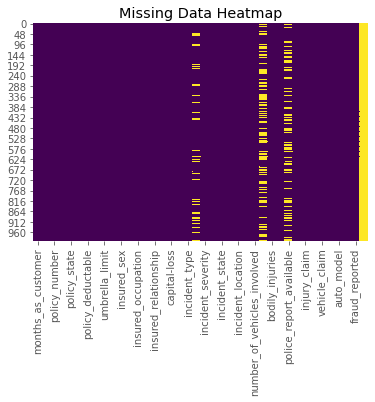

In [ ]:
# Missing Data Heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()


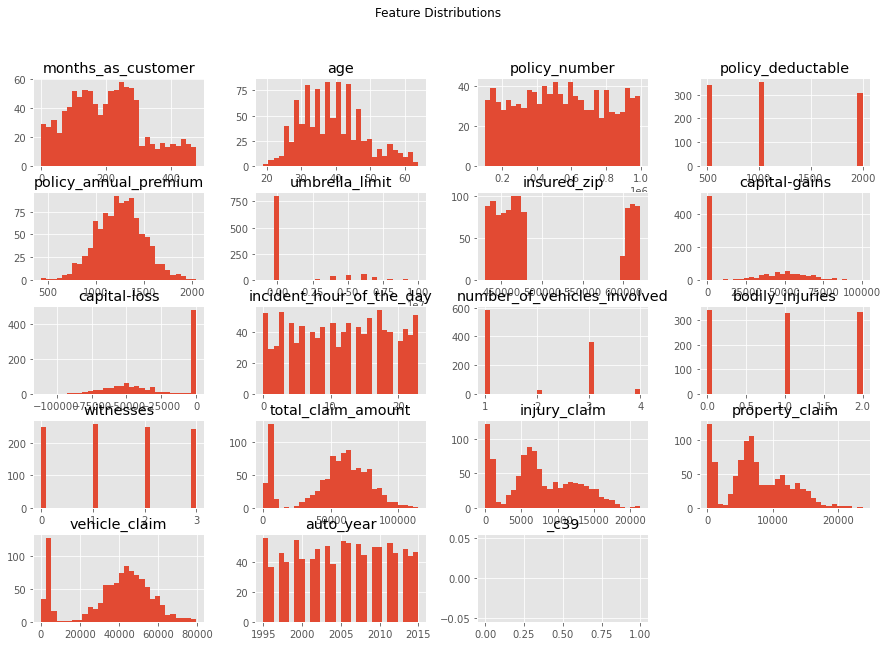

In [16]:
# Feature Distribution
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Feature Distributions")
plt.show()


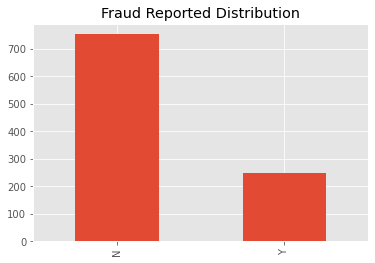

In [17]:
# Categorical bar charts
df['fraud_reported'].value_counts().plot(kind='bar', title='Fraud Reported Distribution')
plt.show()


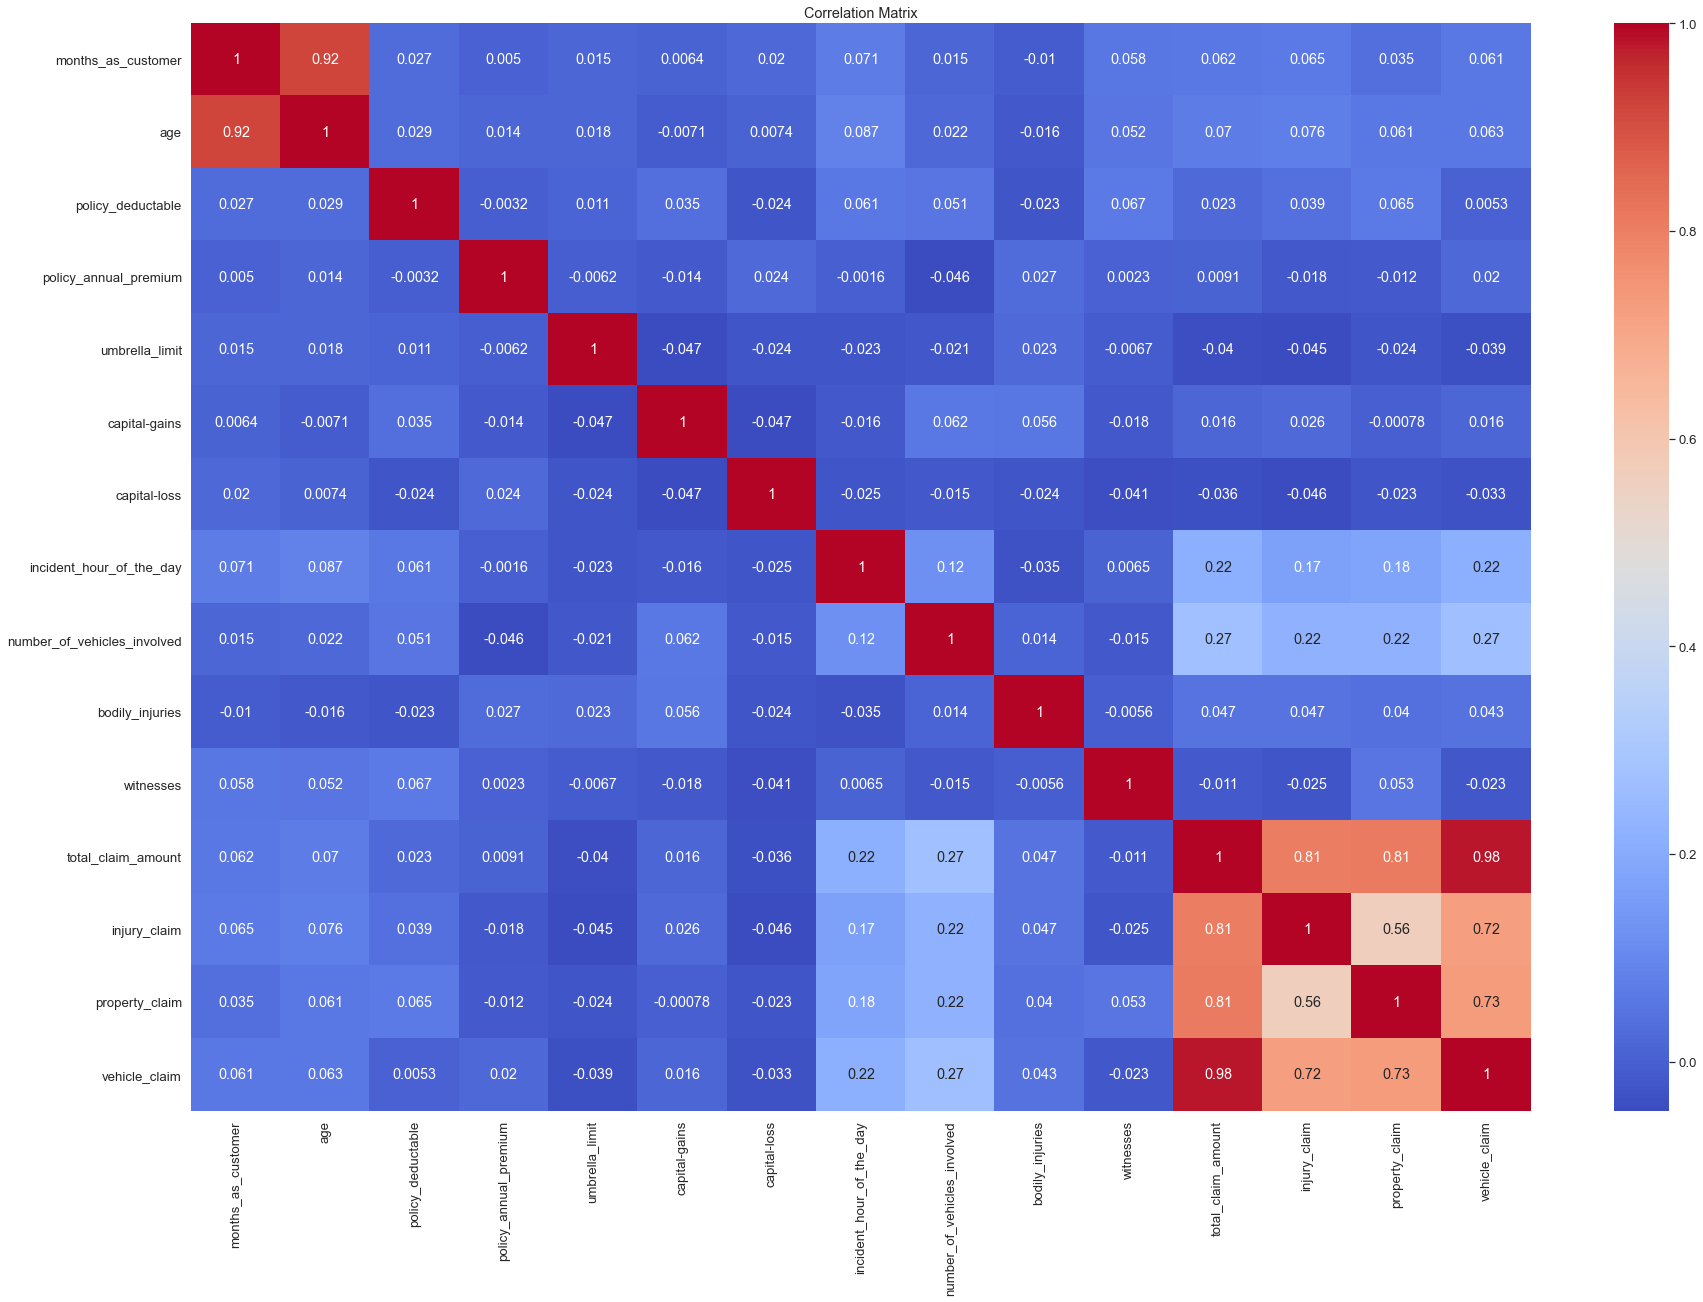

In [40]:
# Check for correlations between numerical feature

corr_matrix = df.corr()
plt.figure(figsize=(30, 20))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm' )
plt.title("Correlation Matrix")

plt.show()



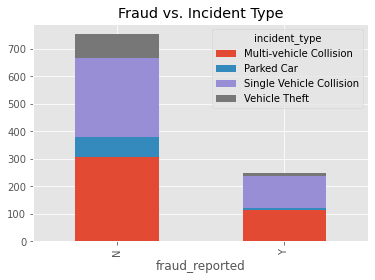

In [ ]:
# Analyze the relationship between categorical features and the target variable.(Cross-tabulation)
pd.crosstab(df['fraud_reported'], df['incident_type']).plot(kind='bar', stacked=True)
plt.title("Fraud vs. Incident Type")
plt.show()


In [30]:
df['fraud_reported'].value_counts(normalize=True)


N    0.753
Y    0.247
Name: fraud_reported, dtype: float64

### **HANDLING MISSING VALUES**

*Setting the attributes having NaN values to 0*

In [22]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])

In [23]:
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])

In [32]:
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

*Counting the NaN values after setting them to 0.
The output received is 0 for all columns which means that number of NaN values are 0.*

In [68]:
# Check if there are still any missing values
print(df.isnull().sum())


months_as_customer                          0
policy_deductable                           0
policy_annual_premium                       0
umbrella_limit                              0
insured_education_level                   572
capital-gains                               0
capital-loss                                0
incident_hour_of_the_day                    0
number_of_vehicles_involved                 0
property_damage                             0
bodily_injuries                             0
witnesses                                   0
police_report_available                     0
injury_claim                                0
property_claim                              0
vehicle_claim                               0
fraud_reported                              0
total_claims                                0
policy_csl_250/500                          0
policy_csl_500/1000                         0
insured_sex_MALE                            0
insured_occupation_armed-forces   

In [69]:
df.isna().sum()

months_as_customer                          0
policy_deductable                           0
policy_annual_premium                       0
umbrella_limit                              0
insured_education_level                   572
capital-gains                               0
capital-loss                                0
incident_hour_of_the_day                    0
number_of_vehicles_involved                 0
property_damage                             0
bodily_injuries                             0
witnesses                                   0
police_report_available                     0
injury_claim                                0
property_claim                              0
vehicle_claim                               0
fraud_reported                              0
total_claims                                0
policy_csl_250/500                          0
policy_csl_500/1000                         0
insured_sex_MALE                            0
insured_occupation_armed-forces   

In [70]:
#Count number of distinct elements in data set
df.nunique()

months_as_customer                        391
policy_deductable                           3
policy_annual_premium                     991
umbrella_limit                             11
insured_education_level                     3
capital-gains                             338
capital-loss                              354
incident_hour_of_the_day                   24
number_of_vehicles_involved                 4
property_damage                             2
bodily_injuries                             3
witnesses                                   4
police_report_available                     2
injury_claim                              638
property_claim                            626
vehicle_claim                             726
fraud_reported                              2
total_claims                              763
policy_csl_250/500                          2
policy_csl_500/1000                         2
insured_sex_MALE                            2
insured_occupation_armed-forces   

#### Data Features Analysis

##### High Cardinality Columns
- **policy_number**, **incident_location**: 
  - Likely unique for each row (1000 unique values).
  - These columns do not contribute meaningful information for fraud prediction and are appropriately dropped.  
- **policy_annual_premium**, **total_claim_amount**, **capital-gains**, **capital-loss**:
  - These columns have high cardinality but remain relevant for analysis and are retained.
##### Low Cardinality Columns
- **insured_sex** (2 values)
- **policy_csl** (3 values)
- **collision_type** (3 values)
- **fraud_reported** (2 values)
  - These columns are good candidates for categorical encoding.
##### Redundant Features
- **policy_state**, **incident_city**, **incident_date**, and other columns from `to_drop`:
  - These columns provide limited or no value for predictive modeling and are dropped.
##### Target Variable (fraud_reported)
- **fraud_reported**: 
  - Binary (2 unique values), ideal for classification tasks.


In [35]:
# Drop unnecessary columns from the dataset for insurance fraud prediction
columns_to_drop = [
    'policy_number', 
    'policy_bind_date', 
    'policy_state', 
    'insured_zip', 
    'incident_location', 
    'incident_date', 
    'incident_state', 
    'incident_city', 
    'insured_hobbies', 
    'auto_make', 
    'auto_model', 
    'auto_year', 
    '_c39'
]

# Drop the specified columns from the DataFrame
df.drop(columns=columns_to_drop, inplace=True)



In [36]:
# viewing the remaining labels
df.head()


,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NO,0,0,NO,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,NO,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


In [42]:
# Select numerical columns
numerical_cols = ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'capital-gains', 'capital-loss']

# Calculate the correlation matrix for numerical columns
numerical_corr = df[numerical_cols].corr()

# Display the correlation matrix
print("Correlation matrix for numerical features:")
print(numerical_corr)


Correlation matrix for numerical features:
                       months_as_customer       age  policy_deductable  \
months_as_customer               1.000000  0.922098           0.026807   
age                              0.922098  1.000000           0.029188   
policy_deductable                0.026807  0.029188           1.000000   
policy_annual_premium            0.005018  0.014404          -0.003245   
capital-gains                    0.006399 -0.007075           0.035212   
capital-loss                     0.020209  0.007368          -0.023544   

                       policy_annual_premium  capital-gains  capital-loss  
months_as_customer                  0.005018       0.006399      0.020209  
age                                 0.014404      -0.007075      0.007368  
policy_deductable                  -0.003245       0.035212     -0.023544  
policy_annual_premium               1.000000      -0.013738      0.023547  
capital-gains                      -0.013738       1.00000

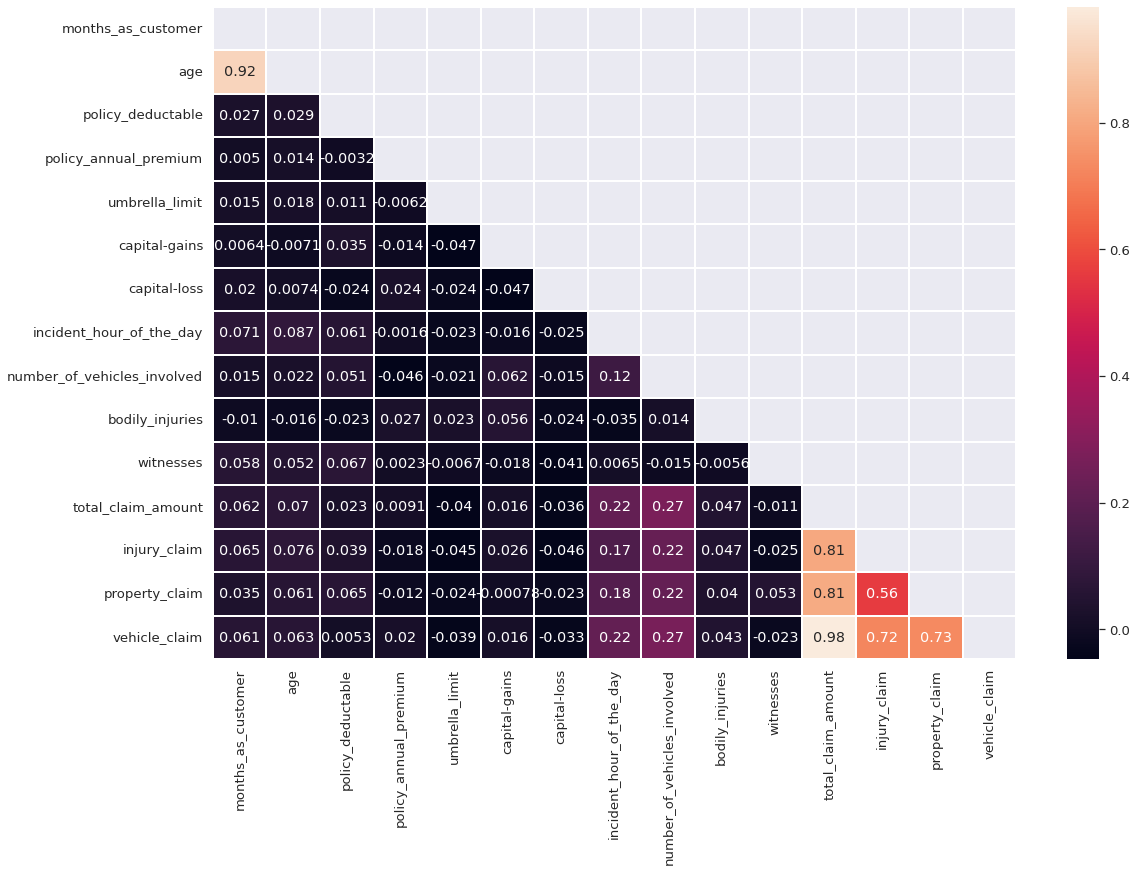

In [ ]:
# checking for multicollinearity

plt.figure(figsize = (18, 12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.set(font_scale = 1.2)

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

#### Key Insights from the Correlation Matrix

##### High Correlation
- **months_as_customer** and **age** have a strong positive correlation of **0.922**. 
  - This suggests that as a customer ages, they are likely to have been with the company for a longer period. 
  - These two features may be somewhat redundant and could potentially be simplified in the analysis.

##### Low to No Correlation
- There is minimal correlation between most other numerical features, such as **policy_deductable**, **capital-gains**, and **capital-loss**.
  - Features like **policy_annual_premium**, **capital-gains**, and **capital-loss** show very low correlation with other features, indicating that they might not have significant relationships with the rest of the numerical features.

We will drop the "Age" column. Also there is high correlation between total_clam_amount, injury_claim, property_claim, vehicle_claim as total claim is the sum of all others. So we will drop the total claim column.


In [43]:
to_drop = ['age','total_claim_amount']
df.drop(to_drop, inplace = True, axis = 1)


In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Selecting only numerical features for VIF calculation
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Adding a constant column to the dataset for intercept
X = add_constant(df[numerical_features])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF
print(vif_data)


                        feature        VIF
0                         const  44.656762
1            months_as_customer   1.014217
2             policy_deductable   1.021938
3         policy_annual_premium   1.008014
4                umbrella_limit   1.007044
5                 capital-gains   1.014405
6                  capital-loss   1.009423
7      incident_hour_of_the_day   1.064712
8   number_of_vehicles_involved   1.094956
9               bodily_injuries   1.010333
10                    witnesses   1.021382
11                 injury_claim   2.126171
12               property_claim   2.212941
13                vehicle_claim   3.212874


#### **Variance Inflation Factor (VIF)**

**VIF** quantifies how much the variance of a regression coefficient is inflated due to collinearity with other predictors. High VIF values indicate significant multicollinearity, which can affect the model's interpretability.

#### **Interpretation of VIF Values:**
- **VIF = 1**: No multicollinearity.
- **VIF between 1 and 5**: Low to moderate multicollinearity.
- **VIF > 5 or 10**: High multicollinearity, indicating potential issues.

#### **Conclusion:**
- Most features have **low VIF values** (below 5), indicating minimal multicollinearity.
- Features like `injury_claim`, `property_claim`, and `vehicle_claim` show moderate VIFs but are below the critical threshold, meaning their correlation with other features is not problematic.
- No drastic action is required, but higher VIF features should be monitored during model training.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   policy_csl                   1000 non-null   object 
 2   policy_deductable            1000 non-null   int64  
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   int64  
 5   insured_sex                  1000 non-null   object 
 6   insured_education_level      1000 non-null   object 
 7   insured_occupation           1000 non-null   object 
 8   insured_relationship         1000 non-null   object 
 9   capital-gains                1000 non-null   int64  
 10  capital-loss                 1000 non-null   int64  
 11  incident_type                1000 non-null   object 
 12  collision_type               1000 non-null   object 
 13  incident_severity  

In [ ]:
# Age and total_claim_amount have been successfully dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   policy_csl                   1000 non-null   object 
 2   policy_deductable            1000 non-null   int64  
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   int64  
 5   insured_sex                  1000 non-null   object 
 6   insured_education_level      1000 non-null   object 
 7   insured_occupation           1000 non-null   object 
 8   insured_relationship         1000 non-null   object 
 9   capital-gains                1000 non-null   int64  
 10  capital-loss                 1000 non-null   int64  
 11  incident_type                1000 non-null   object 
 12  collision_type               1000 non-null   object 
 13  incident_severity  

### **FEATURE ENGINEERING**

#### Feature Interaction:
Create new features by combining existing ones to capture more complex relationships.

Age and Capital Gains/Losses: Create a feature to represent the financial situation of a person, e.g., age_and_capital = df['age'] * df['capital-gains'] to see if older individuals with more capital gains have a higher likelihood of fraud.
Number of Claims: You could add a new feature that sums up the number of claims (injury_claim, property_claim, and vehicle_claim).

In [50]:
df['total_claims'] = df['injury_claim'] + df['property_claim'] + df['vehicle_claim']


#### Binning:
Use the months_as_customer for Binning: features like months_as_customer, which can also be binned into different categories to capture customer tenure.

In [55]:
# Binning months_as_customer into categories like 'New', 'Mid-term', 'Long-term'
bins = [0, 12, 36, 72, 1000]  # Define bins for customer tenure
labels = ['New', 'Mid-term', 'Long-term', 'Very Long-term']
df['customer_tenure'] = pd.cut(df['months_as_customer'], bins=bins, labels=labels)


In [56]:
df.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported,total_claims,customer_tenure
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,YES,1,2,YES,6510,13020,52080,Y,71610,Very Long-term
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,NO,0,0,NO,780,780,3510,Y,5070,Very Long-term
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,NO,2,3,NO,7700,3850,23100,N,34650,Very Long-term
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,NO,1,2,NO,6340,6340,50720,Y,63400,Very Long-term
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,NO,0,1,NO,1300,650,4550,N,6500,Very Long-term


In [ ]:
# # separating the feature and target columns

# X = df.drop('fraud_reported', axis = 1)
# y = df['fraud_reported']

In [ ]:
df.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,8,1,NO,0,0,NO,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,5,1,NO,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,20,1,NO,0,1,NO,1300,650,4550,N


In [57]:
df.columns

Index(['months_as_customer', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'injury_claim', 'property_claim',
       'vehicle_claim', 'fraud_reported', 'total_claims', 'customer_tenure'],
      dtype='object')

#### Encoding Categorical variables

Apply One-Hot Encoding to Nominal Categorical Variables:
For features like policy_csl, insured_sex, incident_type, etc., we can use One-Hot Encoding to convert these columns into binary columns.

In [64]:
# Apply One-Hot Encoding
df = pd.get_dummies(df, columns=['policy_csl', 'insured_sex', 'insured_occupation', 
                                 'incident_type', 'collision_type', 'incident_severity', 
                                 'authorities_contacted', 'insured_relationship'], drop_first=True)


Apply Label Encoding to Ordinal Categorical Variables:
For features like insured_education_level, property_damage, police_report_available, and fraud_reported, you can apply label encoding. For example, binary variables like fraud_reported can be directly encoded to 0 and 1.

In [65]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode binary categorical variables
df['fraud_reported'] = label_encoder.fit_transform(df['fraud_reported'])
df['property_damage'] = label_encoder.fit_transform(df['property_damage'])
df['police_report_available'] = label_encoder.fit_transform(df['police_report_available'])

# For insured_education_level, if it's ordinal (e.g., High School < Bachelor's < Master's < PhD), encode it as well
# You may need to manually assign labels to the education levels, e.g.:
education_mapping = {'High School': 1, 'Bachelors': 2, 'Masters': 3, 'PhD': 4}
df['insured_education_level'] = df['insured_education_level'].map(education_mapping)


In [66]:
# customer_tenure as a categorical feature
df = pd.get_dummies(df, columns=['customer_tenure'], drop_first=True)


In [67]:
print(df.head())  # Check the first few rows of the dataframe to ensure encoding worked
print(df.info())  # Verify that all categorical variables are now numeric


   months_as_customer  policy_deductable  policy_annual_premium  \
0                 328               1000                1406.91   
1                 228               2000                1197.22   
2                 134               2000                1413.14   
3                 256               2000                1415.74   
4                 228               1000                1583.91   

   umbrella_limit  insured_education_level  capital-gains  capital-loss  \
0               0                      NaN          53300             0   
1         5000000                      NaN              0             0   
2         5000000                      4.0          35100             0   
3         6000000                      4.0          48900        -62400   
4         6000000                      NaN          66000        -46000   

   incident_hour_of_the_day  number_of_vehicles_involved  property_damage  \
0                         5                            1             

In [72]:
# Impute missing values in 'insured_education_level' with the mode (most frequent value)
mode_value = df['insured_education_level'].mode()[0]
df['insured_education_level'].fillna(mode_value, inplace=True)

# Check if there are still any missing values
print(df.isnull().sum())


months_as_customer                        0
policy_deductable                         0
policy_annual_premium                     0
umbrella_limit                            0
insured_education_level                   0
capital-gains                             0
capital-loss                              0
incident_hour_of_the_day                  0
number_of_vehicles_involved               0
property_damage                           0
bodily_injuries                           0
witnesses                                 0
police_report_available                   0
injury_claim                              0
property_claim                            0
vehicle_claim                             0
fraud_reported                            0
total_claims                              0
policy_csl_250/500                        0
policy_csl_500/1000                       0
insured_sex_MALE                          0
insured_occupation_armed-forces           0
insured_occupation_craft-repair 

In [58]:
# #extracting categorical columns
# cat_df = X.select_dtypes(include = ['object'])

In [59]:
# cat_df.head()

In [60]:
# # printing unique values of each column
# for col in cat_df.columns:
#     print(f"{col}: \n{cat_df[col].unique()}\n")

In [62]:
# #converting categorical variables to dummy/indicator values
# # one-hot-encoding 
# cat_df = pd.get_dummies(cat_df, drop_first = True)

In [63]:
# cat_df.head()

In [78]:
# extracting the numerical columns

# num_df = X.select_dtypes(include = ['int64'])

In [77]:
# combining the Numerical and Categorical dataframes to get final dataset
# X = pd.concat([num_df, cat_df], axis = 1)

In [75]:
# X.head()

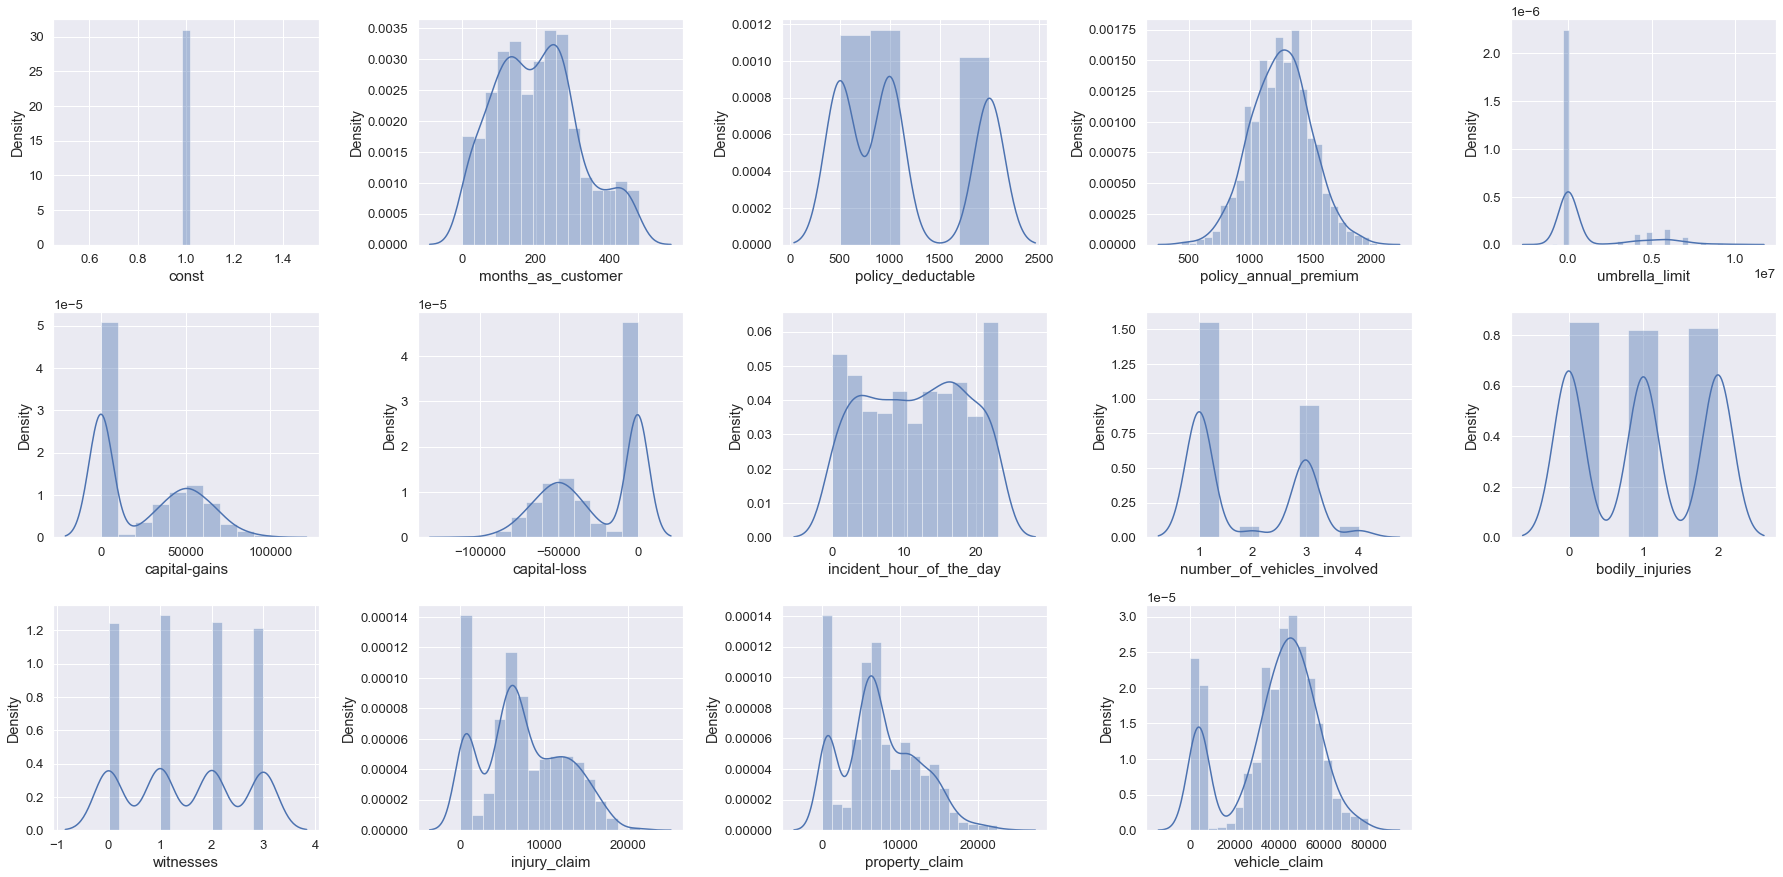

In [74]:
# Displaying the data and checking the density of required data fields
plt.figure(figsize = (25,20))
plotnumber = 1

for col in X.columns : 
  if plotnumber <= 24:
    ax = plt.subplot(5,5, plotnumber)
    sns.distplot(X[col])
    plt.xlabel(col, fontsize = 15)
  
  plotnumber = plotnumber + 1

plt.tight_layout()
plt.show()

### **OUTLIERS DETECTION**

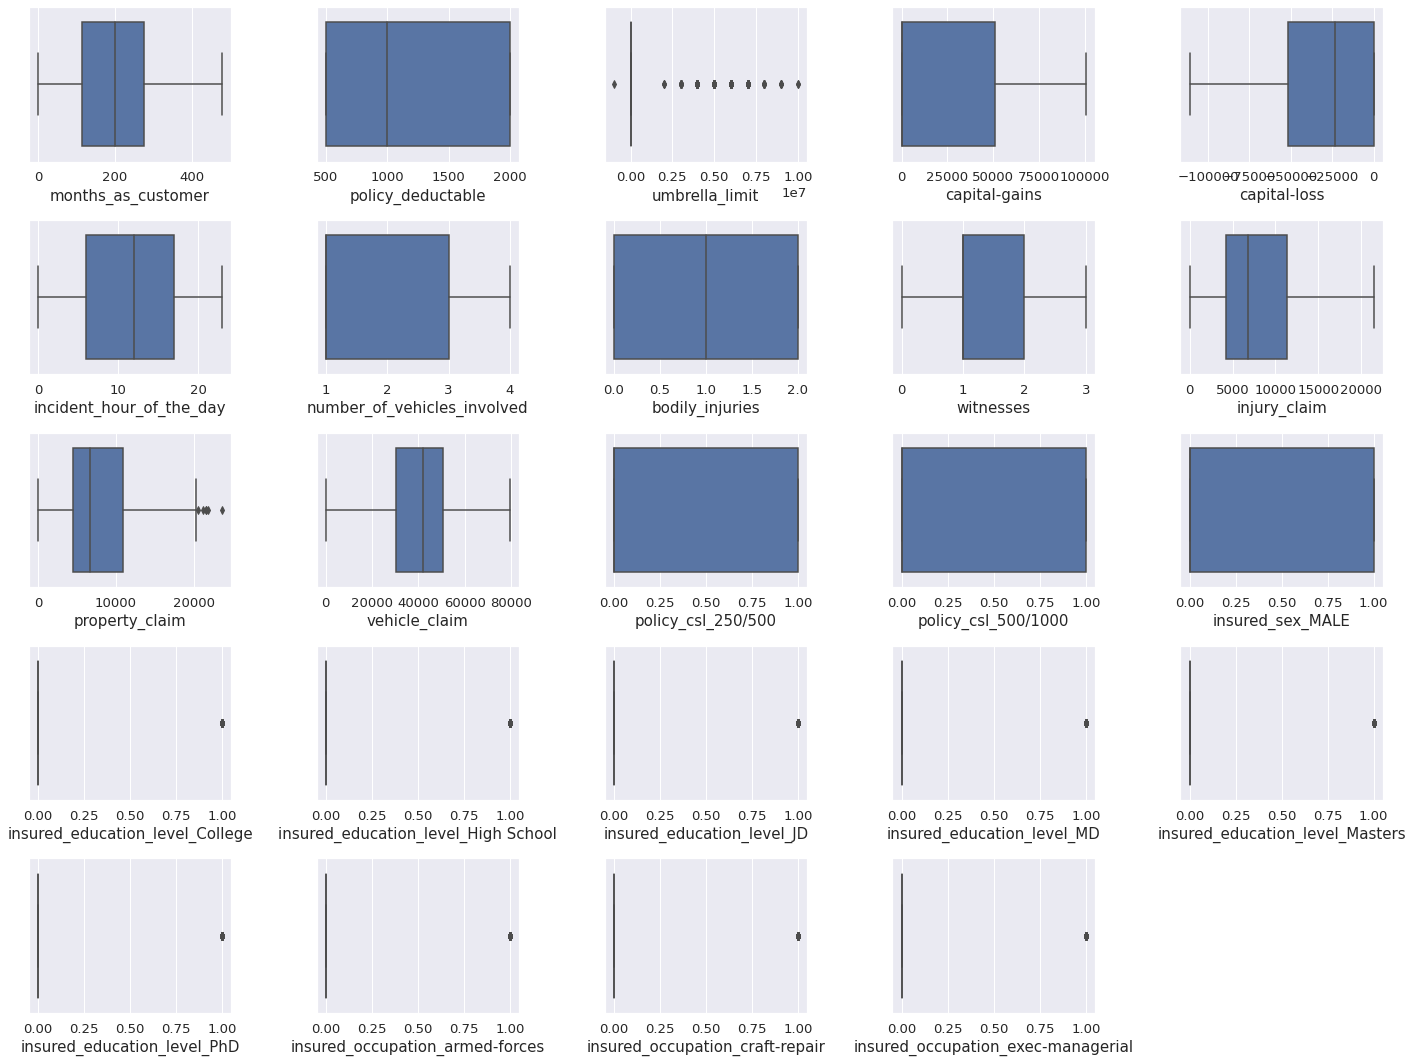

In [ ]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

## MODELING

In [80]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('fraud_reported', axis=1)  # Drop the target column from the feature set
y = df['fraud_reported']  # Target variable

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 800
Test set size: 200


#### Logistic Regression Model Training

Data Splitting


In [83]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('fraud_reported', axis=1)  # Drop the target column from the feature set
y = df['fraud_reported']  # Target variable

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 800
Test set size: 200


Feature Scaling

In [84]:
from sklearn.preprocessing import StandardScaler

# Scaling the features using StandardScaler
scaler = StandardScaler()

# Fit and transform the training data, and only transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Model Training

In [85]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, random_state=42)

Model Evaluation

In [86]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83       145
           1       0.53      0.35      0.42        55

    accuracy                           0.73       200
   macro avg       0.65      0.61      0.62       200
weighted avg       0.71      0.73      0.72       200

Confusion Matrix:
 [[128  17]
 [ 36  19]]
ROC AUC Score: 0.6141065830721003


#### **Model Evaluation Report**

##### **Classification Report:**

- **Precision for Class 0 (No fraud)** = 0.78: This means that when the model predicted "No fraud," it was correct 78% of the time.
- **Recall for Class 0 (No fraud)** = 0.88: The model correctly identified 88% of all actual "No fraud" cases.
- **Precision for Class 1 (Fraud)** = 0.53: The model was correct 53% of the time when predicting "Fraud."
- **Recall for Class 1 (Fraud)** = 0.35: The model correctly identified only 35% of actual fraud cases, indicating a need for improvement in detecting fraud.
- **F1-score for Class 0** = 0.83: The harmonic mean of precision and recall for Class 0, showing good balance in performance for detecting "No fraud."
- **F1-score for Class 1** = 0.42: The F1-score for fraud detection is low, highlighting a need to improve recall for the fraud class.

---

##### **Confusion Matrix Insights:**

- **True Negatives (TN)**: 128 (The number of correct predictions for "No fraud")
- **False Positives (FP)**: 17 (The number of incorrect predictions where "No fraud" was predicted, but it was actually fraud)
- **False Negatives (FN)**: 36 (The number of fraud cases incorrectly predicted as "No fraud")
- **True Positives (TP)**: 19 (The number of correct fraud predictions)

---

##### **ROC AUC Score:**
- **ROC AUC Score** = 0.6141: The ROC AUC score indicates that the model has some discriminative power but is still not performing well. A score closer to 1 would indicate a better model performance, while 0.5 suggests random predictions.

---



#### **Handling Class Imbalance**

In [ ]:
#converting the scaled data(raw form) into a labelled database
scaled_num_df = pd.DataFrame(data = scaled_data, columns = num_df.columns, index = X_train.index)
scaled_num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
950,-0.894528,-1.031675,2.195811,0.162241,-0.574418,-0.414040,-0.829802,-0.014568,-1.327966,-1.325310,-1.436077,-1.783056
482,-0.763045,-1.031675,-0.474048,-0.939006,-0.285255,-0.558473,1.139665,-1.228566,1.361434,-0.160727,-0.172806,0.431934
465,-1.490583,-0.216336,2.195811,0.687836,-1.170375,0.596988,-0.829802,1.199430,-0.431499,0.148327,0.136860,1.403621
252,0.341411,-1.031675,-0.474048,-0.939006,-0.606155,-0.991770,-0.829802,-0.014568,-0.431499,-1.378525,-1.393011,-1.660492
58,-1.683425,1.414340,-0.474048,1.084714,-0.648472,1.463583,-0.829802,-1.228566,-0.431499,-0.021551,-0.033354,0.679140


In [ ]:
#remove the columns and keep the values inplace
X_train.drop(columns = scaled_num_df.columns, inplace = True)
print(scaled_num_df)

     months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
950           -0.894528          -1.031675        2.195811       0.162241   
482           -0.763045          -1.031675       -0.474048      -0.939006   
465           -1.490583          -0.216336        2.195811       0.687836   
252            0.341411          -1.031675       -0.474048      -0.939006   
58            -1.683425           1.414340       -0.474048       1.084714   
..                  ...                ...             ...            ...   
509           -0.675390           1.414340       -0.474048       1.038233   
711           -1.218852           1.414340       -0.474048      -0.939006   
957            0.017087           1.414340        1.305858      -0.939006   
707           -0.447486          -0.216336       -0.474048      -0.939006   
767            0.437832          -1.031675       -0.474048       0.952421   

     capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \

In [ ]:
X_train = pd.concat([scaled_num_df, X_train], axis = 1)


In [ ]:
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
950,-0.894528,-1.031675,2.195811,0.162241,-0.574418,-0.414040,-0.829802,-0.014568,-1.327966,-1.325310,...,0,1,0,0,0,1,0,0,0,0
482,-0.763045,-1.031675,-0.474048,-0.939006,-0.285255,-0.558473,1.139665,-1.228566,1.361434,-0.160727,...,0,0,0,0,0,0,1,0,0,0
465,-1.490583,-0.216336,2.195811,0.687836,-1.170375,0.596988,-0.829802,1.199430,-0.431499,0.148327,...,0,0,0,0,0,0,0,1,0,0
252,0.341411,-1.031675,-0.474048,-0.939006,-0.606155,-0.991770,-0.829802,-0.014568,-0.431499,-1.378525,...,0,0,0,1,0,0,0,1,1,0
58,-1.683425,1.414340,-0.474048,1.084714,-0.648472,1.463583,-0.829802,-1.228566,-0.431499,-0.021551,...,0,0,1,0,0,0,0,0,1,0


### **RANDOM FOREST CLASSIFICATION MODEL**

**In this project, we will use random forest classification technique for fraud detection**



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)
rand_clf.fit(X_train, y_train)

y_pred = rand_clf.predict(X_test)
y_pred

array(['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'Y', 'Y', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'Y',
       'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'Y', 'N

In [ ]:
#checking the accuracy_score, confusion matrix and classification report of the model

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")

#Printing the confusion matrix of the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Training accuracy of Random Forest is : 0.9626666666666667
Test accuracy of Random Forest is : 0.732
[[173   9]
 [ 58  10]]
              precision    recall  f1-score   support

           N       0.75      0.95      0.84       182
           Y       0.53      0.15      0.23        68

    accuracy                           0.73       250
   macro avg       0.64      0.55      0.53       250
weighted avg       0.69      0.73      0.67       250

